In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import math
import copy

In [5]:
data = pd.read_excel("Boston_Housing.xlsx")
data.shape
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
y = data["MEDV"]
X = data.drop(columns=["MEDV"])

X.columns, y.name

(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object'),
 'MEDV')

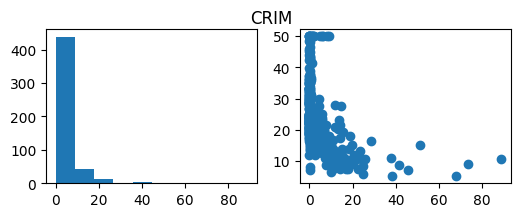

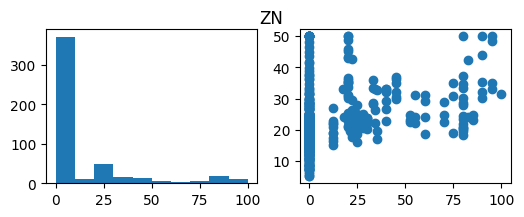

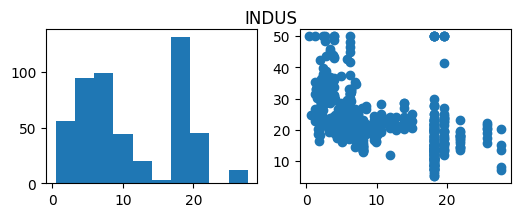

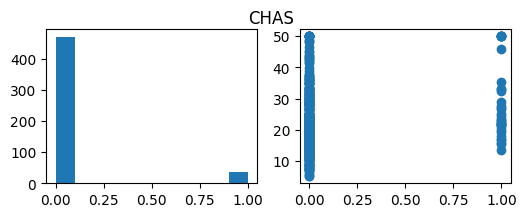

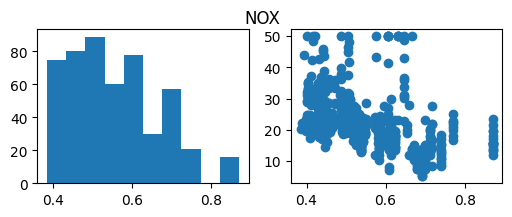

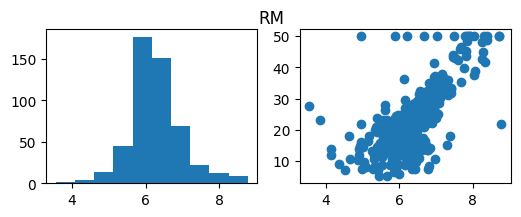

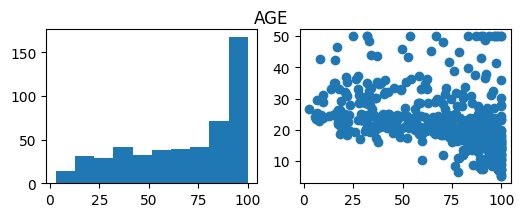

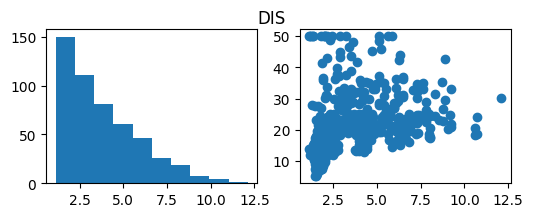

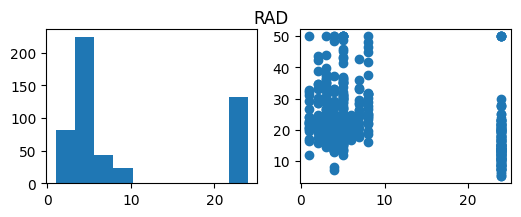

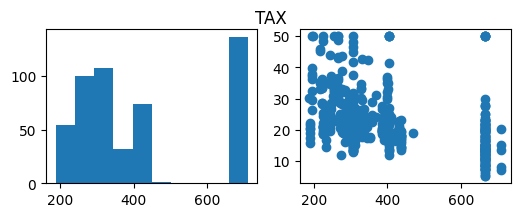

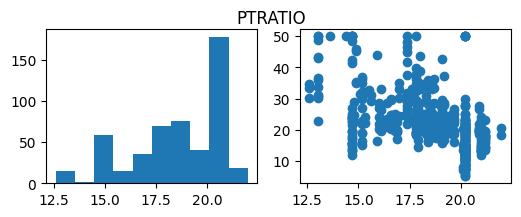

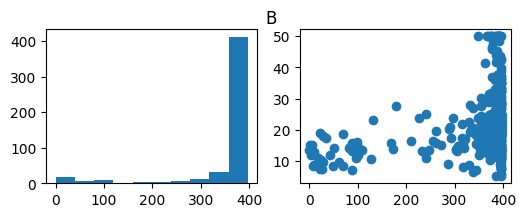

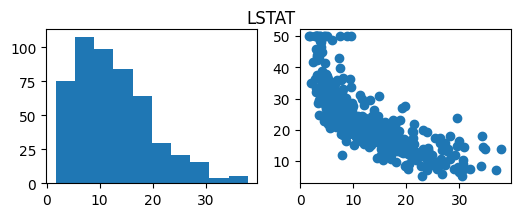

In [7]:
for col in X.columns:
    fig, ax = plt.subplots(1, 2, figsize=(6, 2))
    ax[0].hist(X[col])
    ax[1].scatter(X[col], y)
    fig.suptitle(col)
    plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape

((404, 13), (102, 13))

In [9]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    f_wb = np.dot(X, w) + b
    cost = np.sum(np.power(f_wb - y, 2))
    total_cost = 1 / (2 * m) * cost
    return total_cost

In [10]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    err = (np.dot(X, w) + b) - y
    dj_dw = np.dot(X.T, err)
    dj_db = np.sum(err)

    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_db, dj_dw

In [11]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = cost_function(X, y, w, b)
        J_history.append(cost)

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history

In [12]:
m, n = X_train.shape
w_init = np.zeros(n)
b_init = 0.0

iterations = 1000
alpha = 1.0e-6   # small step size because features are unscaled

w_out, b_out, J_hist = gradient_descent(
    X_train, y_train,
    w_init, b_init,
    compute_cost, compute_gradient,
    alpha, iterations
)

Iteration    0: Cost   179.96
Iteration  100: Cost    41.50
Iteration  200: Cost    40.96
Iteration  300: Cost    40.68
Iteration  400: Cost    40.42
Iteration  500: Cost    40.18
Iteration  600: Cost    39.95
Iteration  700: Cost    39.74
Iteration  800: Cost    39.54
Iteration  900: Cost    39.35


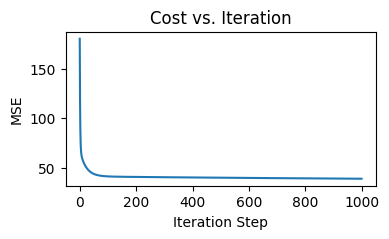

In [13]:
def plot_cost(data, cost_type="MSE"):
    plt.figure(figsize=(4, 2))
    plt.plot(data)
    plt.xlabel("Iteration Step")
    plt.ylabel(cost_type)
    plt.title("Cost vs. Iteration")
    plt.show()

plot_cost(J_hist)

In [14]:
def predict(X, w, b):
    return np.dot(X, w) + b

In [15]:
y_pred = predict(X_test, w_out, b_out)

def compute_mse(y1, y2):
    return np.mean(np.power((y1 - y2), 2))

mse_unscaled = compute_mse(y_test, y_pred)
print("Test MSE (unscaled):", mse_unscaled)

Test MSE (unscaled): 66.89382436652188


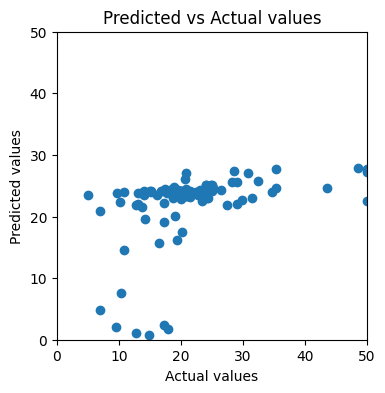

In [16]:
def plot_pred_actual(y_actual, y_pred):
    x_ul = int(math.ceil(max(y_actual.max(), y_pred.max()) / 10.0) * 10)
    y_ul = x_ul

    plt.figure(figsize=(4, 4))
    plt.scatter(y_actual, y_pred)
    plt.xlim(0, x_ul)
    plt.ylim(0, y_ul)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title("Predicted vs Actual values")
    plt.show()

plot_pred_actual(y_test, y_pred)

Iteration    0: Cost   295.90
Iteration  100: Cost    47.36
Iteration  200: Cost    16.30
Iteration  300: Cost    12.00
Iteration  400: Cost    11.32
Iteration  500: Cost    11.15
Iteration  600: Cost    11.07
Iteration  700: Cost    11.02
Iteration  800: Cost    10.98
Iteration  900: Cost    10.95


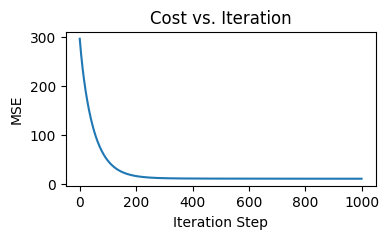

In [17]:
standard_scaler = StandardScaler()
X_train_norm = standard_scaler.fit_transform(X_train)
X_test_norm = standard_scaler.transform(X_test)

m, n = X_train_norm.shape
w_init = np.zeros(n)
b_init = 0.0

iterations = 1000
alpha = 1.0e-2   # larger step size now that features are scaled

w_out_norm, b_out_norm, J_hist_norm = gradient_descent(
    X_train_norm, y_train,
    w_init, b_init,
    compute_cost, compute_gradient,
    alpha, iterations
)

plot_cost(J_hist_norm)

Test MSE (scaled): 25.34969307651814


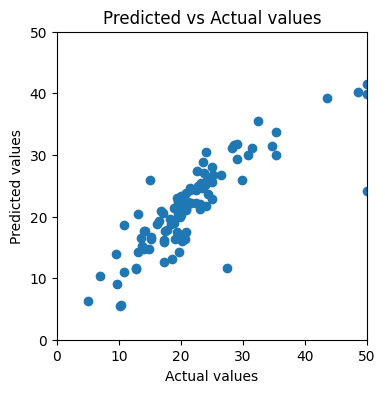

In [18]:
y_pred_norm = predict(X_test_norm, w_out_norm, b_out_norm)

mse_norm = compute_mse(y_test, y_pred_norm)
print("Test MSE (scaled):", mse_norm)

plot_pred_actual(y_test, y_pred_norm)